作業1：使用 LSTM 模型預測股票未來價格，自訂窗口大小（20天），並分析預測效果。

輸入20天收盤價，預測隔一天收盤價

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler
from keras.layers import Dropout



In [3]:
import pandas as pd
data = pd.read_csv("Stock Market Prediction Analysis/DJIA_table(train).csv")[['Date', 'Close']]
data["Date"] = pd.to_datetime(data["Date"], format='%d-%m-%Y')
data.sort_values(by='Date', inplace=True)
data.set_index('Date', inplace=True)
data.head()

,Close
Date,
2008-08-08,11734.32031
2008-08-11,11782.34961
2008-08-12,11642.46973
2008-08-13,11532.95996
2008-08-14,11615.92969


In [4]:
data.tail()

,Close
Date,
2015-12-24,17552.16992
2015-12-28,17528.26953
2015-12-29,17720.98047
2015-12-30,17603.86914
2015-12-31,17425.02930


In [5]:
data.shape


(1863, 1)

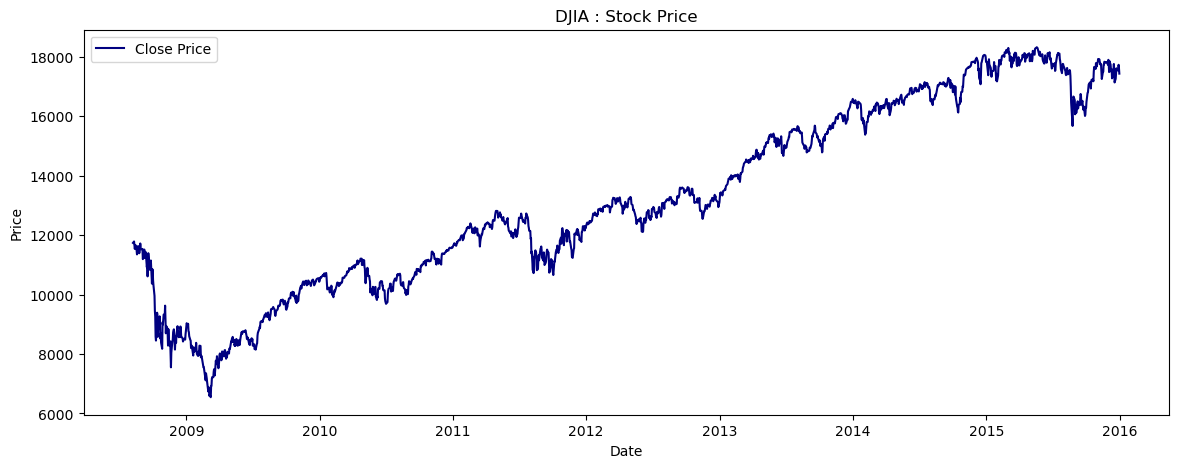

In [6]:
# 查看data視覺化
plt.figure(figsize=(14, 5))
plt.plot(data['Close'], label='Close Price',color="navy")
plt.ylabel('Price')
plt.xlabel('Date')
plt.title(f'DJIA : Stock Price')
plt.legend()
plt.show()


In [7]:

close_data = data['Close'].values
scaler = MinMaxScaler(feature_range=(0, 1))
close_data_scaled = scaler.fit_transform(close_data.reshape(-1, 1))
print(close_data_scaled)

[[0.4408942 ]
 [0.44497647]
 [0.43308732]
 ...
 [0.94973285]
 [0.93977892]
 [0.92457836]]


In [8]:
def create_dataset(dataset, time_step=20):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step)]
        dataX.append(a)
        dataY.append(dataset[i + time_step])
    return np.array(dataX), np.array(dataY)

window_size = 20
X, y = create_dataset(close_data_scaled, window_size)


In [9]:
print(X.shape, y.shape)

(1842, 20, 1) (1842, 1)


In [10]:
# 構建LSTM模型

model = Sequential()
# 第一層 ＬSTM
model.add(LSTM(units=100, return_sequences=True, input_shape=(window_size, 1)))
model.add(Dropout(0.2))


# 第二層 LSTM
model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

# 第三層 : 全連接層
model.add(Dense(units=1))

# 編譯模型
model.compile(optimizer='adam', loss='mean_squared_error')


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [11]:
print(X.shape)
print(y.shape)

print(X)

(1842, 20, 1)
(1842, 1)
[[[0.4408942 ]
  [0.44497647]
  [0.43308732]
  ...
  [0.42377269]
  [0.39447907]
  [0.39726092]]

 [[0.44497647]
  [0.43308732]
  [0.42377949]
  ...
  [0.39447907]
  [0.39726092]
  [0.42189092]]

 [[0.43308732]
  [0.42377949]
  [0.43083154]
  ...
  [0.39726092]
  [0.42189092]
  [0.39809137]]

 ...

 [[0.95758729]
  [0.94964271]
  [0.96395846]
  ...
  [0.92391881]
  [0.93967185]
  [0.93538473]]

 [[0.94964271]
  [0.96395846]
  [0.95047224]
  ...
  [0.93967185]
  [0.93538473]
  [0.9333533 ]]

 [[0.96395846]
  [0.95047224]
  [0.92905257]
  ...
  [0.93538473]
  [0.9333533 ]
  [0.94973285]]]


In [12]:
# 訓練模型
model.fit(X, y, epochs=100, batch_size=16, validation_split=0.1)

# 預測
predicted_prices = model.predict(X)

print(predicted_prices)

Epoch 1/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 7s 27ms/step - loss: 0.0566 - val_loss: 0.0013
Epoch 2/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - loss: 0.0021 - val_loss: 7.2778e-04
Epoch 3/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0022 - val_loss: 8.7131e-04
Epoch 4/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0018 - val_loss: 7.0122e-04
Epoch 5/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - loss: 0.0020 - val_loss: 6.8439e-04
Epoch 6/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0016 - val_loss: 7.9300e-04
Epoch 7/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - loss: 0.0020 - val_loss: 0.0017
Epoch 8/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - loss: 0.0021 - val_loss: 0.0016
Epoch 9/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0015 - val_loss: 0.0064
Epoch 10/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - loss: 0.0019 - val_loss: 0.0015
Epoch 11/100
104/104 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - loss: 0.0017 - val_loss: 6.3455e-04
Epoch 

In [13]:
# 存模型
from keras.models import save_model
save_model(model, "week11/lstm_model.keras")


In [26]:
predicted_prices_re = scaler.inverse_transform(predicted_prices.reshape(-1, 1)).flatten()
print(predicted_prices_re.shape)
print(X.shape)

# 將預測價格加入datetime_index, 為 data 往右移 window_size 天
predicted_prices_re = pd.Series(predicted_prices_re, index=data.index[window_size+1:])
print(predicted_prices_re)
df = pd.concat([predicted_prices_re], axis=1)
df.columns = ['Predicted_Close']
df.tail()


(1842,)
(1842, 20, 1)
Date
2008-09-09    11293.779297
2008-09-10    11461.184570
2008-09-11    11392.131836
2008-09-12    11339.706055
2008-09-15    11423.462891
                  ...     
2015-12-24    17316.347656
2015-12-28    17468.966797
2015-12-29    17477.904297
2015-12-30    17449.296875
2015-12-31    17554.507812
Length: 1842, dtype: float32


,Predicted_Close
Date,
2015-12-24,17316.347656
2015-12-28,17468.966797
2015-12-29,17477.904297
2015-12-30,17449.296875
2015-12-31,17554.507812


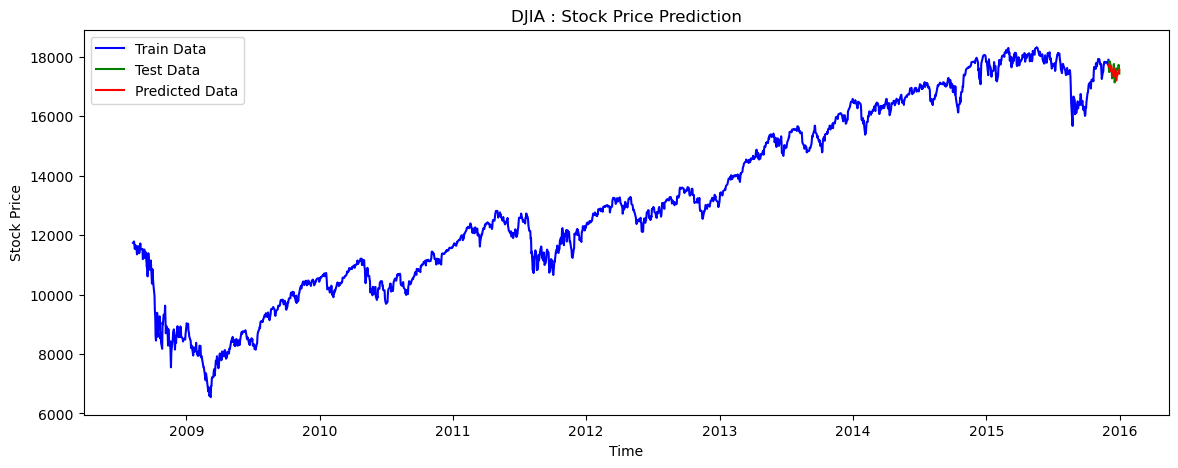

In [27]:
# 繪製圖表
plt.figure(figsize=(14, 5))
plt.plot(data['Close'][:-data.shape[0] + X.shape[0]], color='b', label='Train Data') 
plt.plot(data['Close'][-data.shape[0] + X.shape[0]:], color='g', label='Test Data')
plt.plot(predicted_prices_re[-data.shape[0] + X.shape[0]:], color='r', label='Predicted Data')
plt.title('DJIA : Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [30]:
# 存下預測價格
df.to_csv(f"week11/predicted_prices_{df.index.min().strftime('%Y-%m-%d')}-{df.index.max().strftime('%Y-%m-%d')}.csv", index=True)
